In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import Analysis, sort_plays_by_result

In [7]:
analysis = Analysis(basepath=basepath)

In [8]:
analysis.load_data()

In [9]:
analysis.load_weeks('All')

In [10]:
analysis.weeks.keys()

dict_keys(['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week8', 'week9', 'week10', 'week11', 'week12', 'week13', 'week14', 'week15', 'week16', 'week17'])

In [11]:
analysis.process_games()

In [12]:
analysis.process_teams()

PHI - week1


/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

PHI - week2
PHI - week3
PHI - week4
PHI - week5
PHI - week6
PHI - week7
PHI - week8
PHI - week9
PHI - week10
PHI - week11
PHI - week12
PHI - week13
PHI - week14
PHI - week15
PHI - week16
PHI - week17
CLE - week1
CLE - week2
CLE - week3
CLE - week4
CLE - week5
CLE - week6
CLE - week7
CLE - week8
CLE - week9
CLE - week10
CLE - week11
CLE - week12
CLE - week13
CLE - week14
CLE - week15
CLE - week16
CLE - week17
IND - week1
IND - week2
IND - week3
IND - week4
IND - week5
IND - week6
IND - week7
IND - week8
IND - week9
IND - week10
IND - week11
IND - week12
IND - week13
IND - week14
IND - week15
IND - week16
IND - week17
Play Error
Game ID: 2018121605 - Play ID: 1770
(2:34) (Shotgun) D.Prescott pass incomplete deep left to N.Brown. IND-Q.Wilson was injured during the play.
Play Error
Game ID: 2018121605 - Play ID: 2544
(11:23) D.Prescott pass short right to N.Brown to DAL 39 for 14 yards (M.Adams, A.Walker).
MIA - week1
MIA - week2
MIA - week3
MIA - week4
MIA - week5
MIA - week6
MIA - week7

In [13]:
plays = analysis.return_plays(target_coverage='man')

(2:34) (Shotgun) D.Prescott pass incomplete deep left to N.Brown. IND-Q.Wilson was injured during the play.
(11:23) D.Prescott pass short right to N.Brown to DAL 39 for 14 yards (M.Adams, A.Walker).
(:37) (Shotgun) C.Keenum pass incomplete short left to C.Sutton.
(6:16) (Shotgun) C.Keenum pass incomplete short left to D.Booker.
(5:23) (Shotgun) C.Keenum pass short right to D.Booker to BLT 35 for 5 yards (C.Clark).
(4:57) (No Huddle, Shotgun) C.Keenum pass short right to J.Butt ran ob at BLT 30 for 5 yards.
(:37) (Shotgun) S.Darnold pass incomplete deep left to R.Anderson.
(:32) (Shotgun) S.Darnold pass deep right to D.Burnett pushed ob at NYJ 36 for 25 yards (K.Crossen).
(9:35) S.Darnold pass incomplete short right to R.Anderson (J.Jackson).
(8:50) (Shotgun) S.Darnold pass incomplete short right to J.Leggett.


In [14]:
len(plays)

4378

In [15]:
sorted_plays = sort_plays_by_result(plays)

In [16]:
len(sorted_plays['completed'])

2492

In [17]:
len(sorted_plays['incompleted'])

1791

In [18]:
len(sorted_plays['intercepted'])

94

In [19]:
len(sorted_plays['other'])

1

In [71]:
def pid_lock_tracking(db):
    start = play.events['ball_snap']
    end = play.events['pass_arrived'] + 1
    dt = .1
    
    init_dx, init_dy, init_r = db.distance_to_lock(start - 1)
    
    p = 0
    i = 0
    d = 0
    
    p_vals = []
    i_vals = []
    d_vals = []
    
    last_p = init_r
    
    for frame in range(start, end):
        dx,dy,r = db.distance_to_lock(frame)
        
        p = r
        d = (p - last_p) / dt
        i += d
        
        p_vals.append(p)
        i_vals.append(i)
        d_vals.append(d)
        
        last_p = p
        
    return p_vals, i_vals, d_vals

In [62]:
play = plays[120]

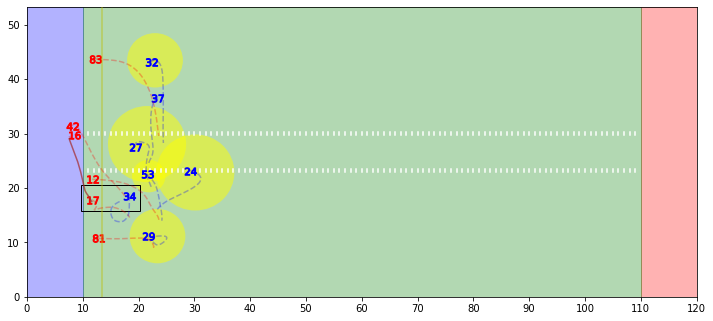

In [63]:
play.plot_play(markers='number', show_coverage=True)

In [64]:
db = play.man_responsible_dbacks[0]

In [65]:
db.number

34

In [66]:
rc = db.locks[0]

In [67]:
rc.number

17

In [68]:
play.events

{'ball_snap': 11,
 'pass_forward': 24,
 'pass_tipped': 27,
 'pass_arrived': 33,
 'pass_outcome_caught': 41,
 'tackle': 52,
 'peak_dropback': 24,
 'end_dropback': 24}

In [72]:
p, i, d = pid_lock_tracking(db)

In [73]:
import matplotlib.pyplot as plt

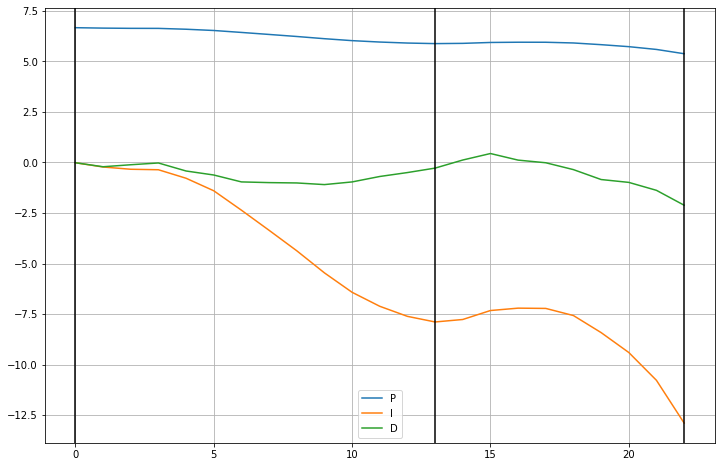

In [74]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(p)
ax.plot(i)
ax.plot(d)

ax.grid()
ax.legend(['P','I','D'])

for _event in ('ball_snap','pass_forward','pass_arrived'):
    ax.axvline(play.events[_event] - play.events['ball_snap'], color='k')

plt.show()

In [75]:
play.play_data

gameId                                                           2018121611
playId                                                                 2334
playDescription           (11:59) (Shotgun) J.Goff pass short right to R...
quarter                                                                   3
down                                                                      3
yardsToGo                                                                12
possessionTeam                                                           LA
playType                                                     play_type_pass
yardlineSide                                                             LA
yardlineNumber                                                            3
offenseFormation                                                    SHOTGUN
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         4
numberOfPass